## Seoul Bike Rental | Data Visualization 🚴🏿‍♀️

![](http://res.heraldm.com/content/image/2018/07/25/20180725000750_0.jpg)

**This notebook explains how we can go about explore and prepare data for model building.**

*The notebook is structured in the following way:*

- About Dataset.
- Data Summary.
- Feature Engineering.
- Missing Value Analysis.
- Visualization:
    - Visualizing Distribution Of Data.
    - Outlier Detection.
    - Correlation Analysis.
    - Visualizing target Vs Feature.
    - Holiday and Functioning_Day analysis

# About Dataset

**Data Feature**

- **Date** : datetime(day/month/year).
- **y** : target feature.
- **Hour** : hour of datetime.
- **Temperature(°C)** : temperature in Celsius.
- **Humidity(%)** : relative humidity.
- **Wind speed (m/s)** : wind speed.
- **Visibility (10m)** : visibility range.
- **Dew point temperature(�C)** : temperature of the air (at constant pressure).
- **Solar Radiation (MJ/m2)** : the total solar energy for a day.
- **Rainfall(mm)** : represents the total depth of rainwater (mm), during 24 hours.
- **Snowfall (cm)** : the amount of snow that falls in a given area or period of time.
- **Seasons** : (Winter,Spring, Autumn, Summer).
- **Holiday** : that day is holiday or not.
- **Functioning Day** : working day or close.

**Import Needed Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seoul-bike-rental-ai-pro-iti/sample_submission.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv


In [2]:
warnings.filterwarnings("ignore")

**Read The Dataset**

In [3]:
df =  pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/train.csv', index_col='ID')

# Data Summary

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

**Dataset Shape**


In [4]:
df.shape

(5760, 14)

**Sample of head dataset**

In [5]:
df.head(3)

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


**Feature Date Type**

In [6]:
df.dtypes

Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

# Feature Engineering

**Rename Columns to can call columns by dot**

In [7]:
df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df.columns]]
df.columns

Index(['Date', 'Y', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

**Set datetime type for Date column**

In [8]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")

**Split Date column to (Day, Month, Year, WeekDay) columns**

In [9]:
df.insert(1,"Day", df.Date.dt.day)
df.insert(2, "Month", df.Date.dt.month)
df.insert(3, "Year", df.Date.dt.year)
df.insert(4, 'WeekDay',df["Date"].dt.day_name())

In [10]:
categoryVariableList = ["WeekDay","Seasons","Holiday","Functioning_Day"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")

# Missing Value Analysis

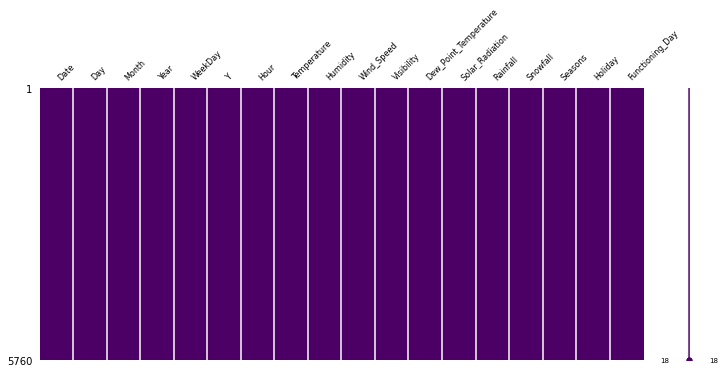

In [11]:
msno.matrix(df,figsize=(12,5),color=(0.3, 0.0, 0.4),fontsize=8)
plt.show()

***there is no missing values on data, but there is a lot of zeros data, it can be nan?***

# Visualization

**Feature Distribution**

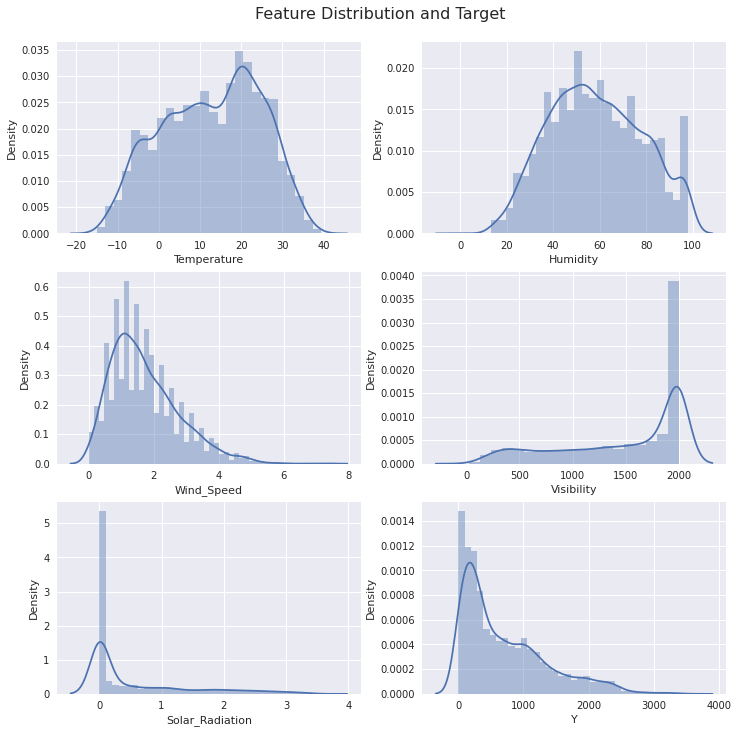

In [12]:
# set style of plot backgroud.
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(3,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.distplot(df.Temperature, ax=ax[0][0])
sns.distplot(df.Humidity, ax=ax[0][1])
sns.distplot(df.Wind_Speed, ax=ax[1][0])
sns.distplot(df.Visibility, ax=ax[1][1])
sns.distplot(df.Solar_Radiation, ax=ax[2][0])
sns.distplot(df.Y, ax=ax[2][1])
plt.show()

**Outliers Detection**

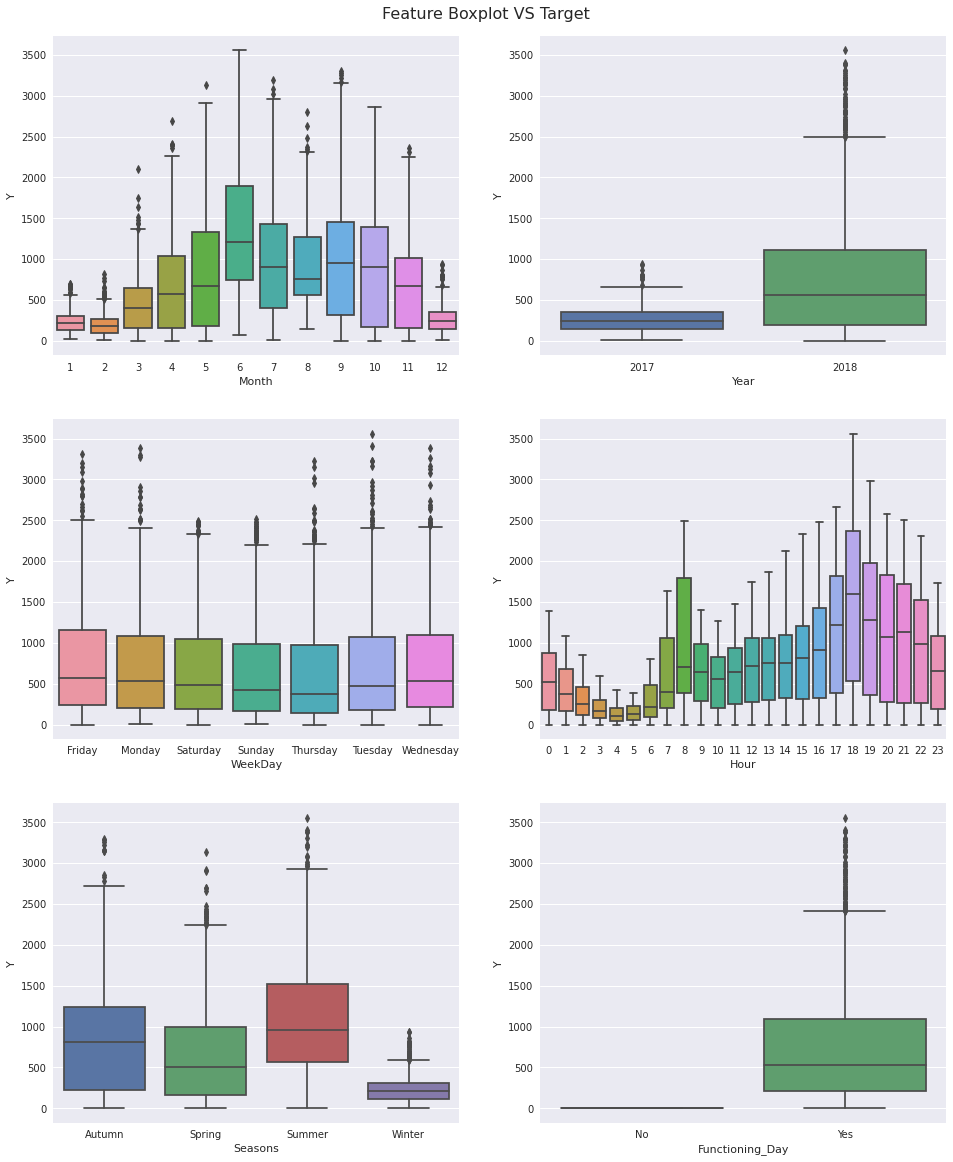

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(16, 20)

fig.suptitle('Feature Boxplot VS Target', fontsize=16, y=0.9)
# draw boxplot for selected feature with target (Y).
sns.boxplot(data=df,y="Y",x="Month", orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="Y",x="Year",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="Y",x="WeekDay",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="Y",x="Hour",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="Y",x="Seasons",orient="v",ax=axes[2][0])
sns.boxplot(data=df,y="Y",x="Functioning_Day",orient="v",ax=axes[2][1])
plt.show()

**Correlation Analysis**


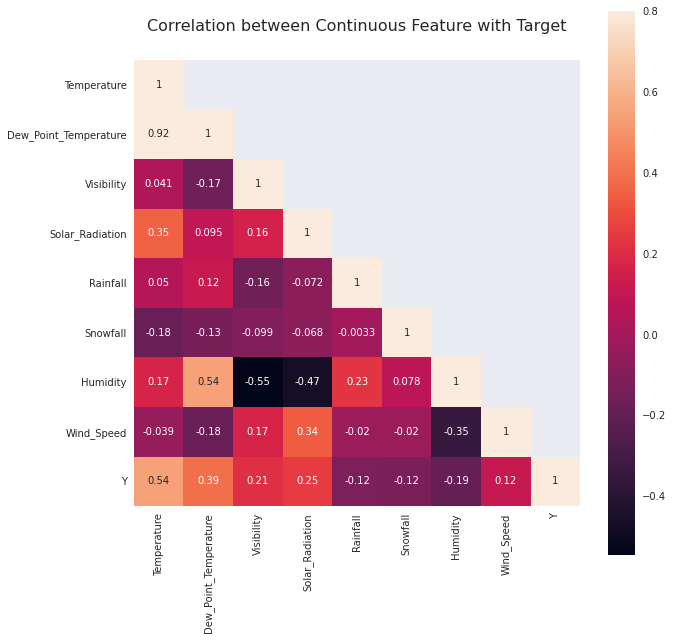

In [14]:
# list of continuous feature
columns = ["Temperature","Dew_Point_Temperature","Visibility","Solar_Radiation",
           "Rainfall","Snowfall","Humidity","Wind_Speed","Y"]
# calculate correlation matrix.
corrMatt = df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

**Best Fitting Line Between Feature And Target**

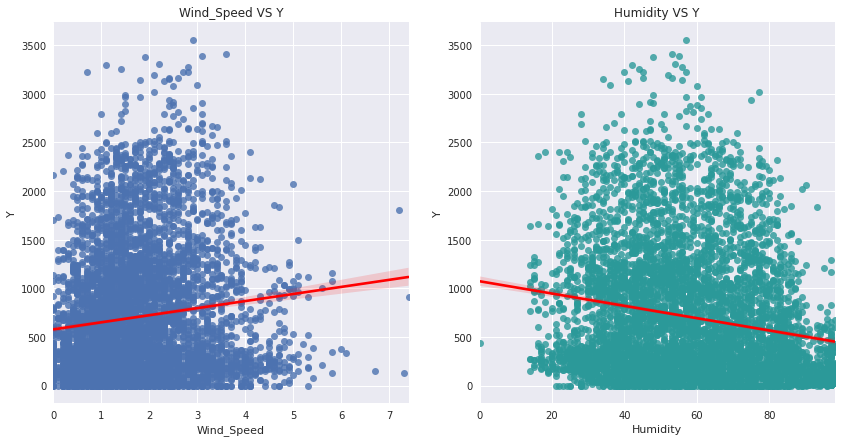

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14, 7)
g1 = sns.regplot(x='Wind_Speed', y="Y", 
                 data=df,ax=ax1,
                 line_kws={'color': 'red'})

g1.set_title('Wind_Speed VS Y')
g2 = sns.regplot(x='Humidity', y="Y",
                 data=df,ax=ax2,
                 color="#2b9999",
                 line_kws={'color': 'red'})

g2.set_title('Humidity VS Y')
plt.show()

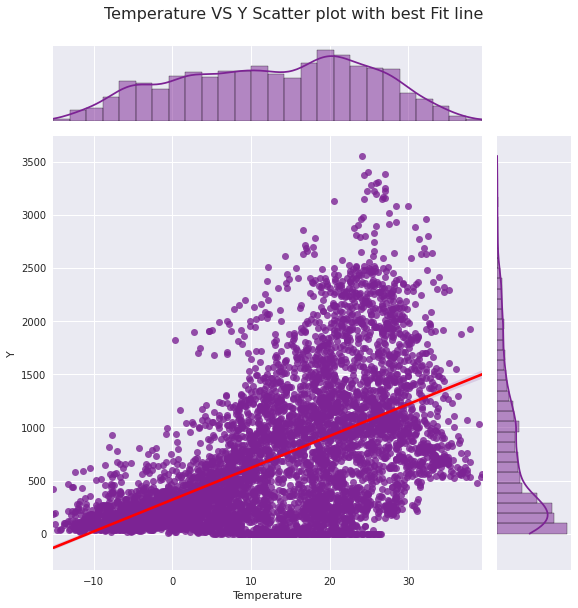

In [16]:
g = sns.jointplot(x="Temperature", y="Y", data=df, kind='reg',color="#7c2394",height=8)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g.fig.suptitle("Temperature VS Y Scatter plot with best Fit line", y=1.05, fontsize=16)
plt.show()

**Target Without Outliers Distribution**

In [17]:
df_without_Outliers = df[np.abs(df["Y"]-df["Y"].mean())<=(1*df["Y"].std())] 

In [18]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without_Outliers.shape)

Shape Of The Before Ouliers:  (5760, 18)
Shape Of The After Ouliers:  (4324, 18)


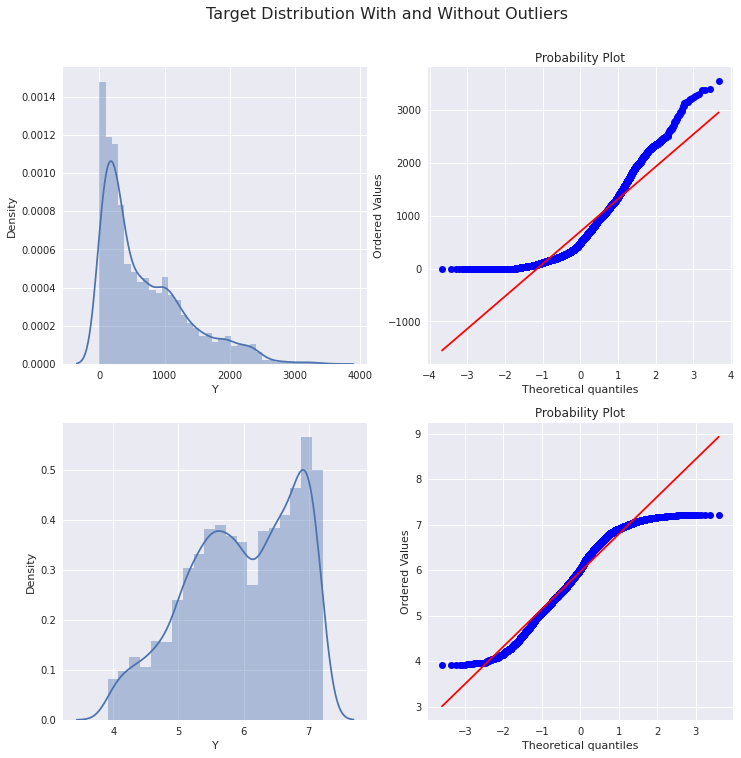

In [19]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 12)
fig.suptitle('Target Distribution With and Without Outliers', fontsize=16, y=0.95)
sns.distplot(df["Y"],ax=axes[0][0])
stats.probplot(df["Y"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(df_without_Outliers["Y"]),ax=axes[1][0])
stats.probplot(np.log1p(df_without_Outliers["Y"]), dist='norm', fit=True, plot=axes[1][1])
plt.show()

**Target Mean Over Month, Hour By Seasons and Hour By WeekDay**

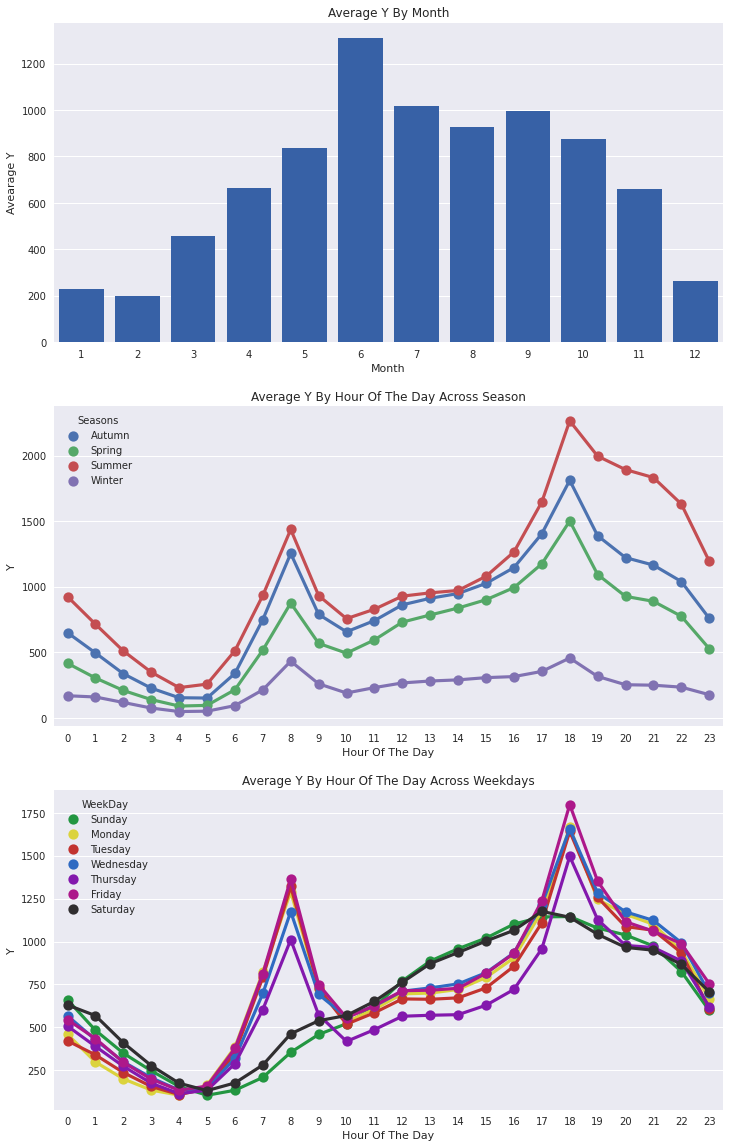

In [20]:
# create subplot contain 3 cell in one column.
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)

# set figure size in inches
fig.set_size_inches(12,20)

# create list of month number.
sortOrder = [*range(1,13)]

# list of week days.
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# group data py month get the mean of target every month. 
monthAggregated = pd.DataFrame(df.groupby("Month")["Y"].mean()).reset_index()

# sort month based on mean of target Y.
monthSorted = monthAggregated.sort_values(by="Y",ascending=False)

# plot all month with mean of value Y as bars.
sns.barplot(data=monthSorted,x="Month",y="Y",ax=ax1,
            order=sortOrder,
            color="#255db8")

# set x label, y label and title
ax1.set(xlabel='Month', ylabel='Avearage Y',title="Average Y By Month")

# group data based on Hour and seasons get mean target Y for every Hour on every season.
hourAggregated = pd.DataFrame(df.groupby(["Hour","Seasons"],sort=True)["Y"].mean()).reset_index()


# plot mean values for every hour for every season as poin plot.
sns.pointplot(x=hourAggregated["Hour"],
              y=hourAggregated["Y"],
              hue=hourAggregated["Seasons"],
              data=hourAggregated, 
              join=True,
              ax=ax2)

# set x label, y label , title and label
ax2.set(xlabel='Hour Of The Day', ylabel='Y',
        title="Average Y By Hour Of The Day Across Season",
        label='big')

# set a list of colors
cmap = ["#239641", "#dbd33d", "#c2332f", "#2f6ac2", "#8318ad", "#ad188a", "#302e30"]

# group data by Hour related with WeekDay by mean of Y target for every Hour for every WeekDay
hourAggregated = pd.DataFrame(df.groupby(["Hour","WeekDay"],sort=True)["Y"].mean()).reset_index()

sns.pointplot(x=hourAggregated["Hour"], 
              y=hourAggregated["Y"],
              hue=hourAggregated["WeekDay"],
              hue_order=hueOrder, 
              data=hourAggregated,
              join=True,ax=ax3, 
              palette=cmap)


ax3.set(xlabel='Hour Of The Day', ylabel='Y',
        title="Average Y By Hour Of The Day Across Weekdays",
        label='big')
# display plot
plt.show()

**Holiday and Functioning_Day analysis**

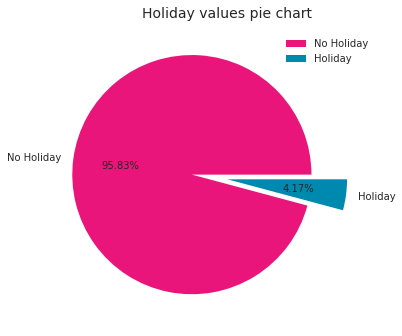

In [21]:
plt.pie(df.Holiday.value_counts(),
        labels=df.Holiday.unique(),
        explode=[0.3,0],
        autopct='%1.2f%%',
        colors=["#ea157a","#0089af"])

plt.title("Holiday values pie chart", y=1.02, fontsize=14)
plt.legend()
plt.show()

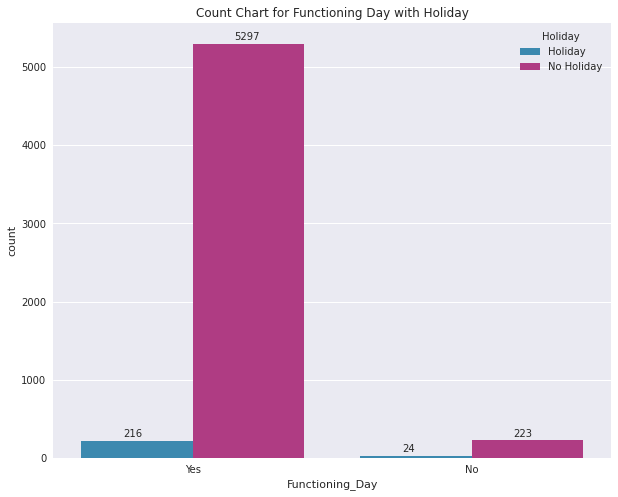

In [22]:
plt.figure(figsize=(10,8))
plt.title('Count Chart for Functioning Day with Holiday')
plt.xlabel('Functioning Day values')
plt.ylabel('count (Y)')

ax = sns.countplot(x= "Functioning_Day",
              data=df,
              order=["Yes", "No"],
              hue="Holiday",
              palette=["#298fc2","#c22987"])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.show()

### Thanks For Read My NoteBook :)